## Download Dataset

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [2]:
from torch_geometric.datasets import TUDataset
tu_data = TUDataset(root="tutorial1",name= "Yeast")
# https://pytorch-geometrimport networkx as nx
t1 = tu_data[1]
t1.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

## Reading the dataset

In [3]:
dataset = t1
print(f'Dataset: {dataset}')
print('----------------')
print(f'Number of graphs: {len(dataset)}')

Dataset: Data(edge_index=[2, 108], x=[53, 74], edge_attr=[108, 3], y=[1])
----------------
Number of graphs: 4


In [4]:
print(f'Number of features: {dataset.num_features}')

Number of features: 74


In [5]:
t1.num_nodes

53

## Move graph to networkX graph

In [12]:
networkX_graph = to_networkx(t1, node_attrs=["x"], edge_attrs=["edge_attr"])

In [13]:
networkX_graph

## Plot dataset

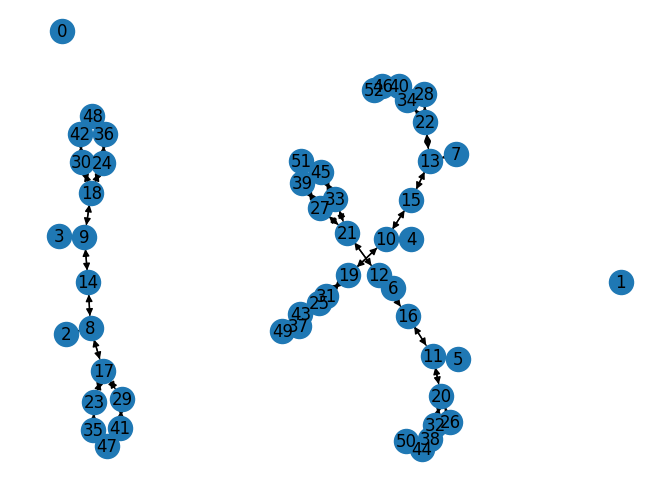

In [62]:
nx.draw(networkX_graph, with_labels = True)
plt.show()

## Directed and Undirected Graph

In [15]:
G = networkX_graph
#make an undirected copy of the digraph
UG = G.to_undirected()
print(type(G))

<class 'networkx.classes.digraph.DiGraph'>


In [16]:
nx.has_bridges(UG)

True

In [17]:
bridges = list(nx.bridges(UG))
len(bridges)

18

In [18]:
list(nx.connected_components(UG))

[{0},
 {1},
 {2, 3, 8, 9, 14, 17, 18, 23, 24, 29, 30, 35, 36, 41, 42, 47, 48},
 {4, 7, 10, 13, 15, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52},
 {5, 6, 11, 12, 16, 20, 21, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51}]

In [19]:
wcc = nx.subgraph(G, list(nx.weakly_connected_components(G))[0])

In [20]:
wcc = nx.subgraph(G, list(nx.weakly_connected_components(G))[2])

## Giant connected Component - The giant connected component (GCC) is simply the largest component by the node count

In [21]:
comp_gen = nx.connected_components(UG)
gcc = sorted(comp_gen, key=len, reverse=True)[0]
gcc

{2, 3, 8, 9, 14, 17, 18, 23, 24, 29, 30, 35, 36, 41, 42, 47, 48}

In [22]:
import pandas as pd
edges = pd.DataFrame(list(G.edges()))
edges

,0,1
0,2,8
1,3,9
2,4,10
3,5,11
4,6,12
...,...,...
103,50,44
104,51,39
105,51,45
106,52,40


## Adjacency Matrix representation

In [23]:
nx.to_pandas_adjacency(G)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Edge List to Pandas

In [24]:
print(nx.to_pandas_edgelist(G))

     source  target        edge_attr
0         2       8  [0.0, 1.0, 0.0]
1         3       9  [0.0, 1.0, 0.0]
2         4      10  [0.0, 1.0, 0.0]
3         5      11  [0.0, 1.0, 0.0]
4         6      12  [0.0, 1.0, 0.0]
..      ...     ...              ...
103      50      44  [1.0, 0.0, 0.0]
104      51      39  [0.0, 1.0, 0.0]
105      51      45  [1.0, 0.0, 0.0]
106      52      40  [0.0, 1.0, 0.0]
107      52      46  [1.0, 0.0, 0.0]

[108 rows x 3 columns]


### The closeness centrality metric attempts to quanify how much a node is close (well connected) to other nodes

In [25]:
nx.degree_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.038461538461538464,
 3: 0.038461538461538464,
 4: 0.038461538461538464,
 5: 0.038461538461538464,
 6: 0.038461538461538464,
 7: 0.038461538461538464,
 8: 0.11538461538461539,
 9: 0.11538461538461539,
 10: 0.11538461538461539,
 11: 0.11538461538461539,
 12: 0.11538461538461539,
 13: 0.11538461538461539,
 14: 0.07692307692307693,
 15: 0.07692307692307693,
 16: 0.07692307692307693,
 17: 0.11538461538461539,
 18: 0.11538461538461539,
 19: 0.11538461538461539,
 20: 0.11538461538461539,
 21: 0.11538461538461539,
 22: 0.11538461538461539,
 23: 0.07692307692307693,
 24: 0.07692307692307693,
 25: 0.07692307692307693,
 26: 0.07692307692307693,
 27: 0.07692307692307693,
 28: 0.07692307692307693,
 29: 0.07692307692307693,
 30: 0.07692307692307693,
 31: 0.07692307692307693,
 32: 0.07692307692307693,
 33: 0.07692307692307693,
 34: 0.07692307692307693,
 35: 0.07692307692307693,
 36: 0.07692307692307693,
 37: 0.07692307692307693,
 38: 0.07692307692307693,
 39: 0.076923076923076

### The betweenness centrality emtric evaluates how much a node acts as a bridge between other nodes

In [26]:
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.05203619909502263,
 9: 0.05203619909502263,
 10: 0.05203619909502263,
 11: 0.05203619909502263,
 12: 0.05203619909502263,
 13: 0.05203619909502263,
 14: 0.048265460030165915,
 15: 0.048265460030165915,
 16: 0.048265460030165915,
 17: 0.042986425339366516,
 18: 0.042986425339366516,
 19: 0.042986425339366516,
 20: 0.042986425339366516,
 21: 0.042986425339366516,
 22: 0.042986425339366516,
 23: 0.013951734539969835,
 24: 0.013951734539969835,
 25: 0.013951734539969835,
 26: 0.013951734539969835,
 27: 0.013951734539969835,
 28: 0.013951734539969835,
 29: 0.013951734539969835,
 30: 0.013951734539969835,
 31: 0.013951734539969835,
 32: 0.013951734539969835,
 33: 0.013951734539969835,
 34: 0.013951734539969835,
 35: 0.005656108597285068,
 36: 0.005656108597285068,
 37: 0.005656108597285068,
 38: 0.005656108597285068,
 39: 0.005656108597285068,
 40: 0.005656108597285068,
 41: 0.005656108597285068,
 42: 0.00565610859

### Assortativity is used to quanify the tendency of nodes being connected to similar nodes. (using the pearson method)

In [28]:
nx.degree_pearson_correlation_coefficient(G)

-0.24752475247524797

### Network Embedding - similar structures will have a small Euclidean distance, while dissimilar structures will have a large Euclidean distance

/Users/muskan/machineLearning/graphs/graph-env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/muskan/machineLearning/graphs/graph-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 162.59it/s]


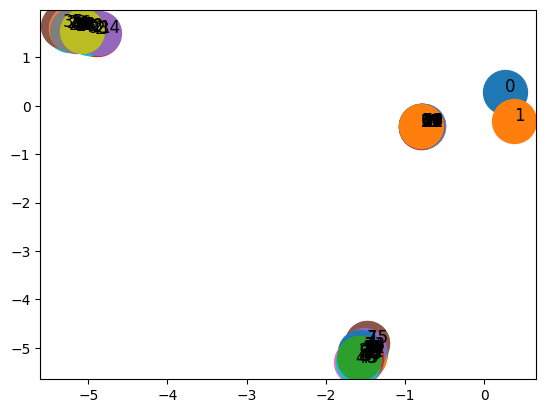

In [31]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
fig, ax = plt.subplots()
for x in G.nodes():
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0],v[1],s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

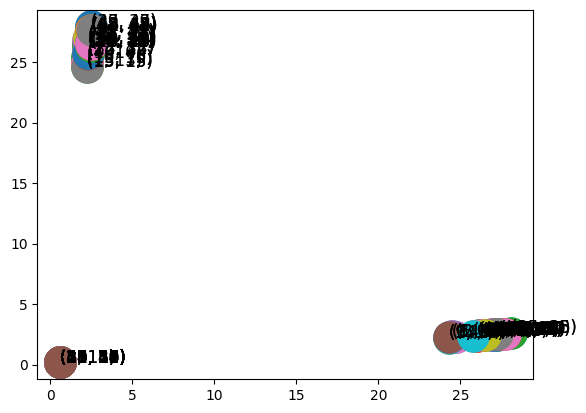

In [33]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
fig, ax = plt.subplots()
for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0], v[1], s=500)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

In [60]:
comp_gen = nx.connected_components(UG)
L1 = sorted(comp_gen, key=len, reverse=True)
#g1 = sorted(comp_gen, key=len, reverse=True)
#g2 = sorted(comp_gen, key=len, reverse=True)[1]
L1[2]


{5, 6, 11, 12, 16, 20, 21, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51}

In [58]:
L1[4]

{1}

### Creating a kernel using jaccard distance

In [50]:
def jaccard(G1, G2):
    #nodes_G1 = set(G1.edges())
    #nodes_G2 = set(G2.edges())

    intersection = G1.intersection(G2)
    union = G1.union(G2)

    similarity = len(intersection) / len(union)

    return similarity

# Assuming G1 and G2 are networkx graphs
G1 = L1[0]
G2 = L1[1]

# Add nodes and edges to G1 and G2 as needed

# Compute Jaccard similarity as a basic graph kernel
similarity_value = jaccard(G1, G2)

print(f"Jaccard Similarity between G1 and G2: {similarity_value}")


Jaccard Similarity between G1 and G2: 0.0


In [69]:
g1 = nx.subgraph(G, list(nx.strongly_connected_components(G))[2])
g1.nodes()

NodeView((2, 3, 35, 36, 8, 41, 9, 42, 14, 47, 48, 17, 18, 23, 24, 29, 30))

In [70]:
g2 = nx.subgraph(G, list(nx.strongly_connected_components(G))[3])
g2.nodes()

NodeView((34, 4, 37, 7, 40, 10, 43, 13, 46, 15, 49, 19, 52, 22, 25, 28, 31))

In [72]:
import numpy as np

def cosine_degree_kernel(G1, G2):
    degree_sequence_G1 = np.array(sorted([d for n, d in G1.degree()], reverse=True))
    degree_sequence_G2 = np.array(sorted([d for n, d in G2.degree()], reverse=True))

    dot_product = np.dot(degree_sequence_G1, degree_sequence_G2)
    norm_G1 = np.linalg.norm(degree_sequence_G1)
    norm_G2 = np.linalg.norm(degree_sequence_G2)

    cosine_similarity = dot_product / (norm_G1 * norm_G2) if (norm_G1 * norm_G2) > 0 else 0.0

    return cosine_similarity

# Example usage:
# Assuming G1 and G2 are networkx graphs with no common nodes
G1 = g1
G2 = g2

# Add nodes and edges to G1 and G2 as needed

kernel_value = cosine_degree_kernel(G1, G2)

print(f"Kernel between G1 and G2: {kernel_value}")


Kernel between G1 and G2: 0.9999999999999998


In [74]:
degree_sequence_G1 = np.array(sorted([d for n, d in G1.degree()], reverse=True))


In [73]:
g1.degree()

DiDegreeView({2: 2, 3: 2, 35: 4, 36: 4, 8: 6, 41: 4, 9: 6, 42: 4, 14: 4, 47: 4, 48: 4, 17: 6, 18: 6, 23: 4, 24: 4, 29: 4, 30: 4})

In [75]:
np.linalg.norm(degree_sequence_G1)

18.110770276274835